In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('x_train.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419
0,0.010254,0.081055,0.062500,-0.091797,-0.057617,-0.084473,0.056641,0.061523,0.039062,-0.125490,-0.075684,-0.054688,0.016113,0.023926,0.032715,0.086914,0.065918,0.021973,-0.086914,-0.058594,0.002930,-0.13574,-0.053223,0.005859,0.039551,0.026855,0.072266,-0.061035,0.011230,0.007324,-0.104980,-0.163090,-0.200200,0.074219,0.020020,0.022461,-0.258790,-0.119140,-0.086914,0.036133,...,0.005859,0.059082,0.004394,-0.005371,0.016113,0.027832,-0.007812,0.036621,0.007324,0.015137,-0.057617,-0.003418,0.037598,-0.012695,-0.058105,-0.020508,0.085938,0.040527,0.177250,-0.085449,-0.108400,-0.100590,0.152340,0.083008,0.122560,0.055176,0.095215,0.043945,0.14551,0.11035,0.019531,0.045410,0.035156,0.070312,0.023926,-0.050293,-0.012207,0.041504,0.044434,0.095703
1,-0.023926,0.076172,0.034180,-0.080078,-0.026367,-0.105960,0.009277,0.041992,0.031738,-0.114260,-0.088867,-0.053223,0.053711,0.032715,-0.000488,0.037109,0.048340,0.011230,-0.084473,-0.053223,-0.047363,-0.14844,-0.091309,-0.003418,-0.037598,-0.006836,-0.017090,-0.045410,0.015137,-0.030273,-0.118650,-0.133300,-0.149900,-0.007812,-0.028809,-0.018555,-0.176270,-0.053711,-0.070801,0.069336,...,0.019043,0.058594,0.043457,0.046387,0.033203,0.075195,0.008789,-0.019043,-0.025879,-0.017090,-0.021484,0.025391,0.097656,-0.049316,-0.039551,-0.015137,-0.000488,-0.030273,0.120610,-0.045898,-0.033203,-0.053711,0.142580,0.163570,0.137210,0.021973,0.079102,0.033203,0.20459,0.16943,0.134770,0.116210,0.073730,0.084473,0.007812,-0.053711,-0.034668,0.063965,0.070801,0.067871
2,-0.009766,0.077637,0.065918,-0.073730,0.004883,-0.086426,-0.078613,0.015625,0.012695,-0.109860,-0.115720,-0.081055,-0.015137,-0.084961,-0.059082,0.031738,0.076660,0.019043,-0.064453,-0.080566,-0.088867,-0.13623,-0.103520,-0.041504,-0.011230,0.039551,-0.017090,-0.006836,0.039062,-0.017578,-0.068848,-0.083984,-0.067871,-0.048340,-0.034180,-0.045898,-0.084473,-0.055664,-0.045898,0.127440,...,0.005859,0.077148,0.056152,0.058594,0.051270,0.061035,-0.021484,-0.093750,-0.085449,-0.043457,-0.009277,0.024414,0.082031,-0.075684,-0.013184,-0.028320,0.027344,0.009277,0.115720,0.056641,0.083984,-0.002441,0.029785,0.104490,0.128420,-0.040527,-0.013672,-0.007324,0.21436,0.17725,0.162110,0.135740,0.081543,0.042480,0.040527,0.019043,-0.011719,0.050781,0.050293,-0.002441
3,0.048828,0.112300,0.123050,-0.067871,-0.020996,-0.076172,-0.157230,-0.002930,-0.024902,-0.101070,-0.090332,-0.073730,-0.046387,-0.061035,-0.021484,0.030762,0.043945,-0.000488,-0.037598,-0.094238,-0.087891,-0.12061,-0.059570,-0.041504,0.035156,0.067871,0.007324,0.027832,0.050781,0.005371,-0.030762,0.023926,0.034180,-0.017090,-0.040039,-0.042480,0.005371,-0.033691,-0.010254,0.154790,...,-0.013184,0.101560,0.084473,0.041504,0.055176,0.069336,-0.026367,-0.143550,-0.132320,-0.078125,-0.053223,-0.099121,-0.156740,-0.040039,0.034180,0.003906,0.046875,-0.009277,0.098633,0.101070,0.102050,0.035156,-0.051270,0.074219,0.111820,-0.083008,-0.052246,-0.033203,0.20361,0.12207,0.160640,0.101560,0.058594,0.003906,0.104980,0.063477,-0.006348,0.053223,0.066895,-0.007812
4,-0.038086,0.037109,0.066895,-0.092773,-0.029297,-0.067871,-0.153320,-0.011230,-0.027344,-0.097168,-0.090332,-0.033691,-0.022949,0.042969,0.080566,0.015137,0.034668,0.034180,-0.000977,-0.022949,-0.051270,-0.11768,-0.018066,-0.006348,0.081055,0.105470,0.067871,0.082520,0.032715,0.015137,0.032227,0.071289,0.115720,0.043457,0.038574,-0.026367,0.077148,-0.010254,0.044922,0.163570,...,-0.029785,0.078125,0.026367,-0.007324,0.002441,0.017578,-0.082520,-0.091309,-0.094727,-0.062012,-0.065918,-0.156250,-0.295410,-0.032227,0.020020,0.013672,0.022461,-0.075684,0.066895,0.080078,0.089844,0.079590,-0.010742,0.099609,0.094238,-0.099121,-0.106450,-0.074219,0.16211,0.10205,0.144040,0.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Columns: 420 entries, 0 to 419
dtypes: float64(420)
memory usage: 3.7 MB


In [ ]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419
count,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,...,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000
mean,-0.001096,-0.000807,-0.001366,-0.003607,-0.004327,-0.003292,0.001268,0.000935,0.000061,0.001479,-0.000201,0.000641,-0.001513,-0.002907,-0.001406,-0.002584,0.000657,-0.001126,-0.001692,-0.004127,-0.001909,0.001609,0.001353,-0.000046,-0.000032,0.000623,0.002382,-0.000190,-0.001375,-0.000454,0.000957,-0.000100,0.002292,0.001109,0.000638,0.001965,-0.001463,0.001577,0.000281,-0.000571,...,-0.000059,0.000468,-0.000294,0.000517,0.000932,0.000475,0.001347,0.000997,0.000959,0.001836,0.000303,0.001607,-0.000493,-0.006440,-0.006577,-0.005031,-0.000852,-0.001416,-0.000974,-0.000653,0.002001,0.000837,0.001171,0.001316,0.001515,0.001298,-0.001836,-0.000012,0.000488,-0.003188,-0.000958,-0.000747,0.002211,0.000488,0.001813,0.002936,0.001481,-0.000760,0.003910,0.000398
std,0.063368,0.069890,0.067713,0.067318,0.066974,0.075070,0.092757,0.073431,0.066523,0.059947,0.066609,0.072123,0.057152,0.068373,0.078128,0.105778,0.088446,0.085308,0.104300,0.078513,0.066643,0.076156,0.075339,0.101978,0.101409,0.078354,0.077203,0.105138,0.080229,0.074353,0.110220,0.086217,0.091751,0.080449,0.069209,0.083293,0.110881,0.081772,0.069213,0.067876,...,0.054752,0.084390,0.084490,0.084691,0.090944,0.083172,0.076709,0.080874,0.097750,0.118419,0.122503,0.139898,0.120872,0.086840,0.097399,0.073200,0.128299,0.121198,0.107946,0.107182,0.119021,0.123501,0.115317,0.126384,0.093696,0.099621,0.101064,0.090894,0.122089,0.125809,0.125157,0.117597,0.150653,0.121240,0.076571,0.081800,0.089683,0.121255,0.104085,0.087604
min,-0.181150,-0.219730,-0.252440,-0.258300,-0.268550,-0.351070,-0.291990,-0.228520,-0.241210,-0.225590,-0.191410,-0.235350,-0.180660,-0.217290,-0.255370,-0.351070,-0.306640,-0.396000,-0.303710,-0.263670,-0.284670,-0.266110,-0.243160,-0.378910,-0.390620,-0.245120,-0.274410,-0.369140,-0.271000,-0.308590,-0.362790,-0.291990,-0.410160,-0.268070,-0.224610,-0.317870,-0.369630,-0.304690,-0.297360,-0.342770,...,-0.203610,-0.379390,-0.291500,-0.361820,-0.355960,-0.259770,-0.275390,-0.294920,-0.298340,-0.436040,-0.406740,-0.427250,-0.449710,-0.540530,-0.418950,-0.388670,-0.402830,-0.423340,-0.386720,-0.393550,-0.348140,-0.411130,-0.409670,-0.322750,-0.285160,-0.356930,-0.276860,-0.329100,-0.427250,-0.450200,-0.497560,-0.540040,-0.437500,-0.452640,-0.271970,-0.210940,-0.329100,-0.393070,-0.354490,-0.299800
25%,-0.041138,-0.047485,-0.047852,-0.046387,-0.049316,-0.047363,-0.056152,-0.046997,-0.041504,-0.038574,-0.044556,-0.048462,-0.037598,-0.050781,-0.050903,-0.066406,-0.054199,-0.048950,-0.066162,-0.054199,-0.041138,-0.045898,-0.046387,-0.057251,-0.054810,-0.053711,-0.045898,-0.065185,-0.054199,-0.045898,-0.070434,-0.059082,-0.053711,-0.044922,-0.044922,-0.046997,-0.063110,-0.052246,-0.041138,-0.043945,...,-0.035645,-0.038086,-0.053833,-0.046509,-0.

In [ ]:
data = data.values
sensor1 = np.zeros((1152,140))
sensor2 = np.zeros((1152,140))
sensor3 = np.zeros((1152,140))
column = 0
for i in range(420):
    if i%3 == 0 :
        sensor1[:,column] = data[:,i]
    elif i%3 == 1:
        sensor2[:,column] = data[:,i]
    elif i%3 == 2:
        sensor3[:,column] = data[:,i]
        column += 1
sensor1 = sensor1.T
sensor2 = sensor2.T
sensor3 = sensor3.T

In [ ]:
sensor1.shape

(140, 1152)

In [ ]:
sensor2.shape

(140, 1152)

In [ ]:
sensor3.shape

(140, 1152)

In [ ]:
print(sensor1)

[[ 0.010254  -0.023926  -0.0097656 ...  0.1084     0.17334    0.22559  ]
 [-0.091797  -0.080078  -0.07373   ...  0.026855   0.015137   0.019043 ]
 [ 0.056641   0.0092773 -0.078613  ...  0.013672   0.0063477 -0.038574 ]
 ...
 [ 0.04541    0.11621    0.13574   ... -0.065918  -0.050781   0.021484 ]
 [ 0.023926   0.0078125  0.040527  ... -0.22314   -0.18262   -0.027832 ]
 [ 0.041504   0.063965   0.050781  ...  0.098145   0.18311    0.18652  ]]


In [ ]:
print(sensor2)

[[ 0.081055   0.076172   0.077637  ...  0.13135    0.18359    0.24561  ]
 [-0.057617  -0.026367   0.0048828 ...  0.015625   0.023438   0.043945 ]
 [ 0.061523   0.041992   0.015625  ... -0.025879   0.003418  -0.0083008]
 ...
 [ 0.035156   0.07373    0.081543  ... -0.12305   -0.10059   -0.07666  ]
 [-0.050293  -0.053711   0.019043  ... -0.15674   -0.12012    0.025391 ]
 [ 0.044434   0.070801   0.050293  ...  0.0048828  0.1582     0.1582   ]]


In [ ]:
print(sensor3)

[[ 0.0625      0.03418     0.065918   ...  0.064941    0.10449
   0.12939   ]
 [-0.084473   -0.10596    -0.086426   ...  0.0097656   0.033691
   0.08252   ]
 [ 0.039062    0.031738    0.012695   ... -0.020508    0.0058594
  -0.0073242 ]
 ...
 [ 0.070312    0.084473    0.04248    ... -0.04541    -0.063477
  -0.033691  ]
 [-0.012207   -0.034668   -0.011719   ... -0.14941    -0.13037
  -0.00048828]
 [ 0.095703    0.067871   -0.0024414  ... -0.016113    0.092285
   0.13379   ]]


In [ ]:
tmin, tmax = 3, 8.9921 #We are only considering the data after 3 seconds as a decision is only made after that.

In [ ]:
!pip install mne

     |████████████████████████████████| 7.4 MB 6.6 MB/s 


In [ ]:
from mne.io import RawArray
import mne
import matplotlib

**Create data in mne**

In [ ]:
info_sensor1 = mne.create_info(140, sfreq = 128, verbose=None, ch_types='eeg') #The no. of trials are 140 and each trial is sampled at 128 Hz. Hence, sfreq = 128.
raw = RawArray(sensor1, info = info_sensor1)
raw.crop(tmin, tmax) # Cropping the data to eliminate the first 3 seconds as a decision is not made during this time.

Creating RawArray with float64 data, n_channels=140, n_times=1152
    Range : 0 ... 1151 =      0.000 ...     8.992 secs
Ready.


<RawArray | 140 x 768 (6.0 s), ~976 kB, data loaded>

In [ ]:
info_sensor2 = mne.create_info(140, sfreq = 128, verbose=None, ch_types='eeg') #The no. of trials are 140 and each trial is sampled at 128 Hz. Hence, sfreq = 128.
raw2 = RawArray(sensor2, info = info_sensor2)
raw2.crop(tmin, tmax) # Cropping the data to eliminate the first 3 seconds as a decision is not made during this time.

Creating RawArray with float64 data, n_channels=140, n_times=1152
    Range : 0 ... 1151 =      0.000 ...     8.992 secs
Ready.


<RawArray | 140 x 768 (6.0 s), ~976 kB, data loaded>

In [ ]:
info_sensor3 = mne.create_info(140, sfreq = 128, verbose=None, ch_types='eeg') #The no. of trials are 140 and each trial is sampled at 128 Hz. Hence, sfreq = 128.
raw3= RawArray(sensor3, info = info_sensor3)
raw3.crop(tmin, tmax) # Cropping the data to eliminate the first 3 seconds as a decision is not made during this time.

Creating RawArray with float64 data, n_channels=140, n_times=1152
    Range : 0 ... 1151 =      0.000 ...     8.992 secs
Ready.


<RawArray | 140 x 768 (6.0 s), ~976 kB, data loaded>

Effective window size : 6.000 (s)


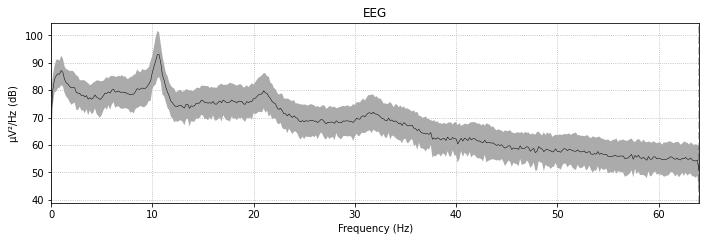

Text(0.5, 0.98, 'UnFiltered C3')

In [ ]:
fig = raw.plot_psd(fmax=64, average=True) # Visualizing Power-Line Noise in channel C3
fig.subplots_adjust(top=0.85)
fig.suptitle('UnFiltered C3', size='xx-large', weight='bold')

Effective window size : 6.000 (s)


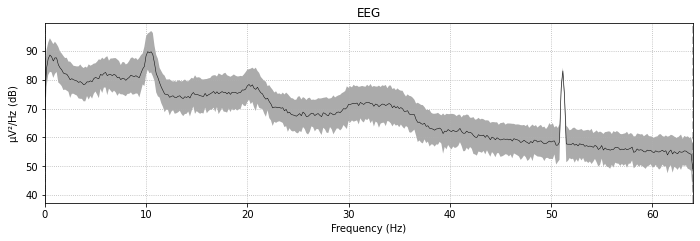

Text(0.5, 0.98, 'UnFiltered C3')

In [ ]:
fig = raw2.plot_psd(fmax=64, average=True) # Visualizing Power-Line Noise in channel C3
fig.subplots_adjust(top=0.85)
fig.suptitle('UnFiltered C3', size='xx-large', weight='bold')

Effective window size : 6.000 (s)


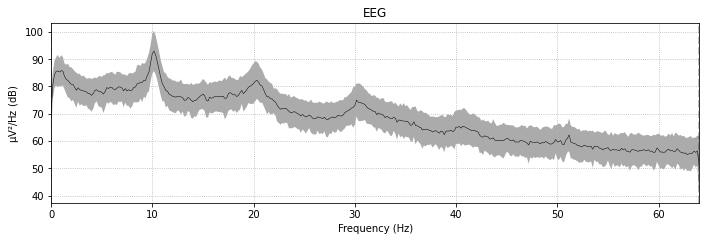

Text(0.5, 0.98, 'UnFiltered C4')

In [ ]:
fig = raw3.plot_psd(fmax=64, average=True) # Visualizing Power-Line Noise in channel C3
fig.subplots_adjust(top=0.85)
fig.suptitle('UnFiltered C4', size='xx-large', weight='bold')

**Low and High filter**

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 10 - 22 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 10.00
- Lower transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 8.75 Hz)
- Upper passband edge: 22.00 Hz
- Upper transition bandwidth: 5.50 Hz (-6 dB cutoff frequency: 24.75 Hz)
- Filter length: 169 samples (1.320 sec)

Effective window size : 6.000 (s)


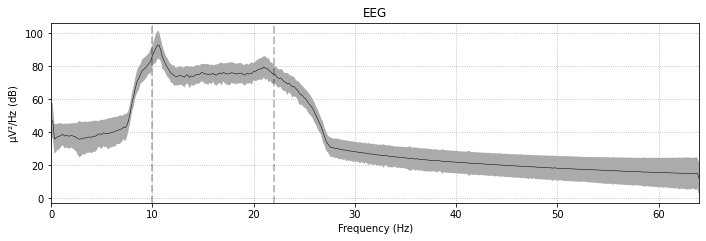

Text(0.5, 0.98, 'Filtered C3')

In [ ]:
raw1_LowAndHigh = raw.copy().filter(10, 22)

fig = raw1_LowAndHigh.plot_psd(fmin=0, fmax=64, average=True)

fig.suptitle('Filtered C3', size='xx-large', weight='bold')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 10 - 22 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 10.00
- Lower transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 8.75 Hz)
- Upper passband edge: 22.00 Hz
- Upper transition bandwidth: 5.50 Hz (-6 dB cutoff frequency: 24.75 Hz)
- Filter length: 169 samples (1.320 sec)

Effective window size : 6.000 (s)


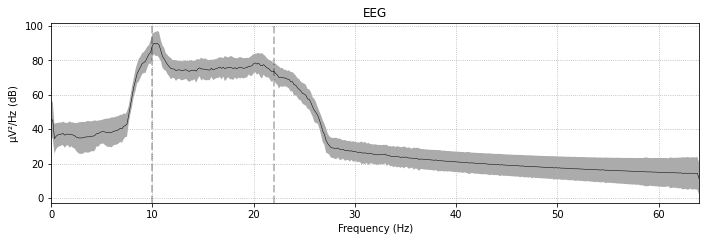

Text(0.5, 0.98, 'Filtered CZ')

In [ ]:
raw2_LowAndHigh = raw2.copy().filter(10, 22)

fig = raw2_LowAndHigh.plot_psd(fmin=0, fmax=64, average=True)

fig.suptitle('Filtered CZ', size='xx-large', weight='bold')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 10 - 22 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 10.00
- Lower transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 8.75 Hz)
- Upper passband edge: 22.00 Hz
- Upper transition bandwidth: 5.50 Hz (-6 dB cutoff frequency: 24.75 Hz)
- Filter length: 169 samples (1.320 sec)

Effective window size : 6.000 (s)


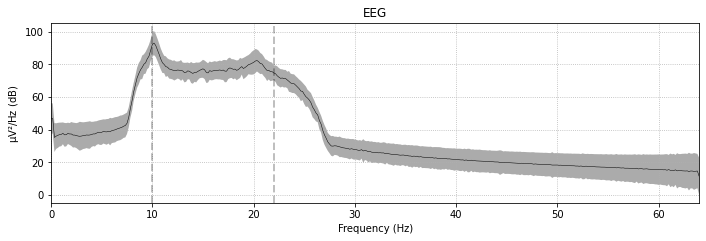

Text(0.5, 0.98, 'Filtered C4')

In [ ]:
raw3_LowAndHigh = raw3.copy().filter(10, 22)

fig = raw3_LowAndHigh.plot_psd(fmin=0, fmax=64, average=True)

fig.suptitle('Filtered C4', size='xx-large', weight='bold')

In [ ]:
len(raw) 

768

**Convert the data from mne to dataframe**

In [ ]:
df_C3 = raw1_LowAndHigh.to_data_frame()
df_C3.drop(columns='time', inplace=True)
df_C3 = df_C3.T
df_C3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767
0,-1.531436e-12,16207.472292,26429.401132,27726.973993,20319.777681,6594.812407,-8269.283573,-16528.662112,-12517.064256,-258.668029,6274.065673,-4520.082623,-27238.430548,-40068.223041,-24392.232496,15080.364613,51925.673170,61267.991732,41008.778077,9153.328354,-17173.529632,-35798.904965,-51592.000094,-59996.289850,-45851.107239,-2112.526457,53553.380628,86776.846366,74114.751665,23670.292580,-32006.988088,-62494.811940,-59787.059299,-36085.745351,-7558.389918,17071.719499,34878.441985,42198.525045,34622.331836,13449.505869,...,8213.421500,66146.814296,99785.852566,110791.547105,101097.348191,67448.554796,9063.747512,-61050.697283,-116139.154550,-130971.516488,-100191.097918,-42248.348213,15394.510062,56087.394179,80130.337524,93435.410029,93623.377382,70483.668935,20540.260407,-41530.446177,-89088.011846,-102490.940702,-82140.365333,-44159.471155,-5592.006789,25278.584455,47036.346258,58848.671165,59132.347440,48396.294472,30022.362857,7281.499841,-17728.036771,-40662.205185,-52627.984373,-45938.345585,-23793.937695,-1254.076107,6794.392942,0.000000e+00
1,-4.255494e-12,40493.001584,56908.854093,47062.184930,28263.899671,14802.386345,2614.279115,-20457.122296,-52015.723504,-69308.031103,-50315.634190,137.142273,49312.311375,64174.726177,40626.406628,4749.910140,-14006.341799,-9450.048433,741.596328,-2601.579255,-20135.238357,-35353.491515,-32426.638104,-10333.539420,18456.925438,39083.899762,42945.134584,29353.709765,4279.777969,-21134.486373,-34499.087305,-29957.551956,-13595.161185,1205.443003,6073.403165,5063.621680,8065.584682,17168.281849,22271.915655,12595.219832,...,5943.066751,-636.994167,453.920962,4541.253346,3346.569691,-5873.399897,-17120.209235,-21049.924905,-13144.468660,2805.282384,17702.799396,23450.727579,17749.839834,5133.371195,-6225.556336,-10134.028820,-7001.482977,-3296.029030,-4822.843320,-10072.118661,-11137.459392,-2658.240236,10575.407102,16892.928172,10470.204785,-723.649553,-2567.633952,8283.201999,17709.113861,7895.755708,-20946.637005,-45404.559413,-39566.783854,-2549.317461,37025.991382,46876.024556,22244.099289,-9762.818391,-18204.040395,8.673617e-12
2,1.721171e-11,-65296.174651,-100038.885017,-93574.084476,-60016.266798,-24655.235072,-3574.897727,7172.818194,24481.445816,59268.892723,101147.100291,120430.532815,88503.150289,3151.121637,-101103.489753,-169407.029045,-161688.422218,-81912.138201,22595.184333,93875.426325,104338.985907,72771.882676,41790.005285,36588.894471,42981.482661,25418.043820,-32180.589068,-103356.354567,-138730.923735,-110317.480937,-36364.409513,37588.353431,80728.182715,97639.464581,107521.013002,109240.243705,76081.959445,-9827.084530,-121569.082915,-194767.223654,...,-16829.364393,-49315.466382,-58043.438924,-64115.226827,-77681.272012,-80813.014124,-46459.806549,25958.322372,99012.919026,126005.620044,92659.175628,29122.741606,-19186.891725,-31668.149826,-24652.642047,-27932.503691,-52570.723185,-81199.000083,-85700.022633,-51703.346948,11467.343165,78758.038445,123720.923981,128902.596938,90771.041298,21343.202428,-54371.723444,-107651.355958,-119683.428028,-90978.216948,-39262.518930,12146.981668,46680.270709,59425.422873,54375.800767,39094.348423,21385.528799,7664.788926,1095.860017,-2.081668e-11
3,1.287490e-12,-31949.829936,-41962.636117,-27496.669259,-4746.911431,9686.357080,13212.853479,13697.787899,15803.758891,15335.259397,6994.184670,-6285.884613,-14960.609448,-13314.013737,-5583.080507,-380.997842,-934.735753,-2689.304423,-91.797839,6226.423468,10303.031805,7883.524941,1232.238901,-3399.730394,-2357.309906,1872.932843,3379.561764,-1202.603101,-9410.939050,-15082.949353,-13519.211247,-4793.173075,7362.179758,18875.343392,26631.392239,26956.433329,15407.283621,-8804.467513,-36832.376891,

In [ ]:
df_Cz = raw2_LowAndHigh.to_data_frame()
df_Cz.drop(columns='time', inplace=True)
df_Cz = df_Cz.T
df_Cz.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767
0,9.873016e-12,-9034.276855,-256.980898,23379.101597,40612.597817,35113.512483,13449.927779,-3110.057572,-3928.000692,-2026.398641,-17987.737625,-51595.536958,-74733.156465,-57245.043881,89.163582,61958.326159,89812.238933,75175.310747,40370.111516,9198.457857,-16385.123001,-47363.628430,-80794.186765,-91709.856052,-57335.052819,12967.300489,78236.453155,99340.820902,70785.131838,19648.797873,-23056.039264,-45827.343692,-53850.227633,-51271.890924,-33995.905695,-329.405610,37606.010136,58861.194407,51268.602655,22042.216900,...,-3689.138692,28415.843677,46981.355500,54575.851281,53970.345315,42529.850360,15893.752350,-22798.995817,-59030.207011,-74743.971074,-62037.623374,-29240.600481,6630.106640,33363.448795,49041.825690,55883.665257,52280.743306,34165.514411,3912.111347,-26007.600086,-41853.991452,-41094.366363,-33595.570488,-29335.450448,-26482.348361,-14191.742677,12805.028567,44422.774615,62025.259661,54743.076603,28246.719496,-1893.810509,-23277.137008,-32810.256667,-33133.221626,-27285.708544,-17804.439596,-8259.622710,-2239.458186,-3.035766e-12
1,2.412350e-12,7744.451134,15690.714420,26441.112350,40390.630428,48808.668254,36463.625595,-3388.718792,-55755.070033,-89135.700160,-78933.789902,-28668.422823,31448.481301,67931.617717,68113.929073,44001.598662,16172.401340,-4132.882824,-18415.662748,-31219.212701,-41075.856996,-41507.657866,-28535.104237,-5279.348909,20214.406598,39593.641132,46684.722175,38327.648055,16321.690816,-10769.480918,-30439.214781,-34243.557034,-24318.042033,-10966.554146,-2926.829398,37.878082,4358.621746,13271.739618,21664.368241,21263.701311,...,29237.302395,1460.811890,-21501.400322,-27170.014820,-18781.040041,-9514.576530,-8062.642160,-10102.595370,-4016.586586,14753.643265,35459.776258,39523.141917,17909.861481,-17879.139892,-42810.095153,-38836.623148,-10778.409320,17770.677892,25765.504526,13160.581865,-1546.822526,-1939.374163,8941.519277,12739.842312,-2435.217793,-26168.553064,-34404.818495,-15029.762154,17316.146035,34385.870518,22909.782839,-1774.195927,-12565.389812,-356.772174,15953.879026,10901.587298,-17618.115080,-43079.014693,-37008.842046,3.469447e-12
2,1.120794e-11,-32846.694354,-50959.812725,-48626.120638,-32152.208775,-14211.100375,-3679.135461,1448.844730,11266.037089,32548.964416,58574.052341,70282.620023,50154.444966,-1507.316638,-61853.860479,-97912.090150,-88334.591351,-38759.220626,21091.715759,57424.087322,55582.517837,29218.142756,7552.669939,9858.791585,28365.075395,35350.368364,9506.275601,-41672.733362,-85168.749690,-89463.750061,-50430.470561,7215.006105,52647.839679,72345.826320,72469.061620,62338.953647,40674.475338,709.041443,-52996.729839,-97413.188602,...,-31895.688745,-67008.919356,-71187.270257,-50689.468841,-24139.737951,-3901.247897,12373.442016,32691.901709,55707.190998,67499.664676,54298.490771,17743.549190,-23706.539249,-49038.796474,-50774.907964,-38118.668188,-25530.792773,-19235.000122,-14164.597442,-1945.763148,19655.280549,44275.837397,61337.850664,61762.845199,41376.666717,2738.343480,-43155.075824,-78060.716248,-83981.328692,-54850.434586,-3451.302529,44114.466050,64510.201430,52101.397160,20764.248983,-8332.373233,-21871.887586,-20069.634811,-10738.869344,3.469447e-12
3,-1.450120e-12,-31901.044339,-41493.336991,-27629.419183,-8691.224624,-918.837715,-1683.951047,3741.663757,20667.448624,34749.528941,26467.923302,-4730.245890,-34438.429158,-34740.200386,-2714.588306,34071.459050,42297.658706,14239.336132,-25374.153271,-43478.998912,-29349.851700,-1535.292254,13887.645246,9435.900736,54.254680,3027.294397,17827.356072,27750.522276,19459.611207,-2414.505131,-20900.616857,-24180.368502,-14843.541334,-3086.966576,4606.833670,7546.248643,5131.441138,-4475.310258,-17489.485446,-210

In [ ]:
df_C4 = raw3_LowAndHigh.to_data_frame()
df_C4.drop(columns='time', inplace=True)
df_C4 = df_C4.T
df_C4.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767
0,-2.354752e-12,194.086887,13603.116516,35138.212941,45026.863792,30766.382066,2353.810147,-17570.652777,-18036.698679,-10699.467376,-14192.472817,-30200.797283,-39948.474150,-26239.850654,4980.615981,30024.413660,34172.815727,27314.201311,28551.561541,38166.773331,33131.030266,-4921.522744,-60839.646526,-92464.219905,-69637.216940,-5264.402344,55064.669879,73471.758772,48699.920843,8104.180466,-21619.743663,-32228.574629,-28410.614719,-15073.517989,4888.688653,24057.810350,30743.900106,19372.951552,-1841.552989,-17925.850934,...,-10940.126122,22018.046518,27281.879363,16255.194966,15355.553464,35515.126117,56753.537947,46734.783835,-3439.073623,-64017.997387,-90704.646121,-65121.170551,-10717.919757,31636.755125,41212.947752,30147.732187,22174.590907,24835.176809,25624.047005,11782.080395,-12518.769198,-30986.533306,-33615.418829,-25765.847123,-18770.901406,-15382.513952,-7819.449277,10460.644835,34049.766140,48380.787646,42463.884511,18071.437174,-12013.034439,-33143.193592,-37302.894902,-26097.202484,-8531.653179,4464.434882,6614.279948,6.938894e-12
1,-4.702727e-12,4965.623566,8936.687924,19701.149102,43462.153053,66378.109678,57527.361043,507.034974,-78420.722763,-122703.063227,-94449.893798,-12278.621131,63146.426726,83425.009112,52814.236275,15675.886023,7476.513331,21422.001142,22434.982831,-10636.580546,-60665.518442,-88388.659040,-69251.468933,-13769.922608,44070.309418,74540.342939,69956.175271,41864.448980,7584.579944,-20228.277388,-35879.860860,-38864.758347,-32023.577023,-19818.888174,-6001.917279,7878.358009,21143.791901,30902.936662,31510.514783,18685.631840,...,39900.313652,-12663.606095,-55653.630371,-55674.434824,-16907.721630,19804.212678,16539.822237,-20594.456941,-43511.496827,-11539.772041,59819.543816,105124.169735,70742.649568,-27560.237474,-112117.988908,-113467.715474,-34994.355112,52546.330385,80434.744102,44315.341221,-1887.180902,-9019.722092,16662.880432,27035.157730,-8784.964053,-66160.817040,-88344.582682,-45735.435921,32450.250560,85657.409118,78588.271740,29461.091176,-14532.550684,-25009.383102,-13810.260405,-10917.307231,-27436.571480,-44094.370462,-35304.581635,-6.938894e-12
2,3.049319e-13,-65084.722519,-96690.308213,-80082.817381,-27924.607561,27620.010763,55842.657392,48331.518764,22948.566835,6380.010779,9614.434477,18647.362588,9804.153311,-24145.608890,-62585.185751,-72595.216230,-38174.190912,23277.385453,72447.351713,77728.048546,38480.268838,-16126.806758,-49806.633051,-44888.360529,-12007.422019,20990.849139,30814.080013,14323.125999,-12678.817880,-30320.902764,-29555.906692,-15327.316572,2358.327188,18343.884490,32751.869307,43205.631792,40567.074406,16254.612620,-24964.722471,-61911.489238,...,-78835.913848,-92939.469560,-72904.723350,-23800.652440,32915.638175,72846.913641,84391.496190,73207.590898,51969.962584,27372.537328,-1855.445820,-35545.061966,-64516.809803,-75461.709979,-63340.583156,-36639.550043,-9055.705473,12786.392507,31128.750794,48155.957375,59298.373932,57531.701225,42453.500774,20799.521207,-2906.701525,-31826.921820,-67946.420558,-98121.603131,-95717.299985,-43730.922215,41306.880871,112161.150947,124277.162213,71669.808090,-8177.015522,-65533.413228,-76391.458537,-53298.395122,-23422.461432,-5.204170e-12
3,-9.649399e-12,-60929.309833,-75494.839607,-42123.028963,-851.074738,12681.830617,3377.339545,3654.262250,29273.961949,56445.029476,47537.057776,-3532.991088,-58515.687371,-70595.844312,-31086.081635,22805.720002,46312.614546,29928.840042,2450.909575,-5273.388376,6040.216560,9297.752613,-13193.476843,-45294.693846,-51834.788057,-16745.111545,36972.170186,67476.093107,53018.002034,9989.010482,-26026.007812,-33696.768772,-19738.134390,-4243.166470,1068.587641,-1620.846539,-6526.707282,-11985